In [5]:
# Módulo/bibliotecas utilizadas
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [6]:
# Define caminhos de input e output
IMG_PATH  = './'  #diretorio atual                # diretório de imagens (output)

In [7]:
#salvar
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Cria séries de dados sintéticos
t = np.linspace(0,2*2*np.pi,200) #cria valores de maneira linear entre 0 e 4pi
y1 = np.cos(3*np.pi*t/10) + np.sin(5*t) + np.sin(8*t) + np.sin(12*t) + 0.2*np.random.randn(len(t)) #aplica um ruido (aleatorio) -> 0.2 (no maximo 20% do sinal será ruido)
# y1 = sinal + ruido
y2 = np.cos(3*np.pi*t/10) + np.sin(5*t) + np.sin(8*t) + 0.2*np.random.randn(len(t))

Text(0.5, 0, 't')

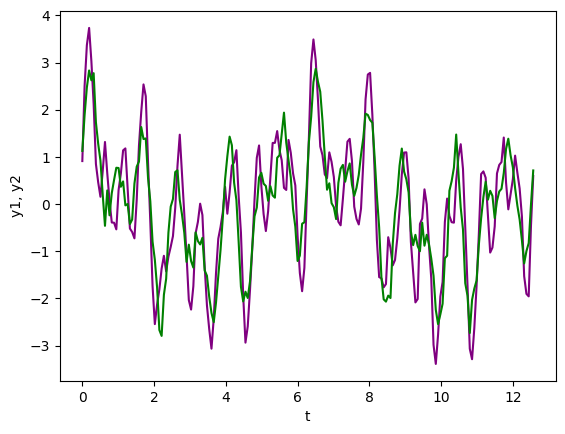

In [9]:
plt.plot(t,y1, color = 'purple')
plt.plot(t,y2, color = 'green')
plt.ylabel('y1, y2')
plt.xlabel('t')

In [10]:
def calcula_correlacao(serie1,serie2):

    # remove médias
    serie1 -= serie1.mean()
    serie2 -= serie2.mean()

    # calcula correlação (cov (serie1, serie2) / std(serie1) std(serie2) )
    corr = serie1.T@serie2 / np.sqrt( (serie1.T@serie1) * (serie2.T@serie2) ) # T = transposta -> multiplicação matricial entre serieN e transposta da serieN
    #@ multiplicação matricial
    #* multiplicação por elementos individualmente - ponto a ponto

    return corr

# Calcula correlação entre série y1 e y2
calcula_correlacao(y1,y2)

0.8370464866152754

In [11]:
# Recalcula a corelação utilizando uma built-in function
np.corrcoef(y1,y2)[0,1]

0.8370464866152757

In [12]:
# Duas correlação séries parecidas com lag de
omg = 2*np.pi/5
y3 = np.cos(omg*t) + 0.1*np.random.randn(len(t))
y4 = np.cos(omg*(t-1.25)) + 0.1*np.random.randn(len(t))

Text(0.5, 1.0, 'y3 lidera y4')

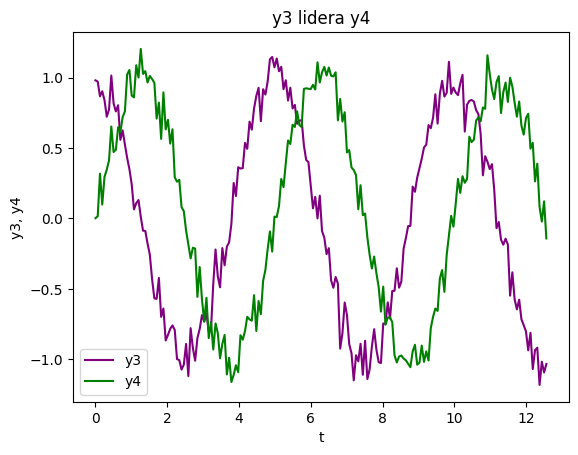

In [13]:
plt.plot(t,y3,label='y3', color = 'purple')
plt.plot(t,y4,label='y4', color = 'green')
plt.ylabel('y3, y4')
plt.xlabel('t')
plt.legend()
plt.title('y3 lidera y4')

In [14]:
# Calcula correlação entre série y1 e y2 e y3 e y4
calcula_correlacao(y1,y2), calcula_correlacao(y3,y4)

(0.8370464866152754, -0.009580362164000945)

In [15]:
# correlação com lag - atraso entre sinais
n = len(t)
lags = np.arange(-n+1,n)*t[1]
corr_y3_y4 = np.convolve(y3,y4, mode='full') # função que calcula a convolução entre y3 e y4
nmax = corr_y3_y4.argmax()
corr_y3_y4 /= corr_y3_y4[nmax]  # a correlação é a convolução normalizada pelo seu máximo
lags[nmax], corr_y3_y4[nmax]

#convolução entre x e y

(-1.1998042295116798, 1.0)

Text(0, 0.5, 'Correlação com lag entre y3 e y4')

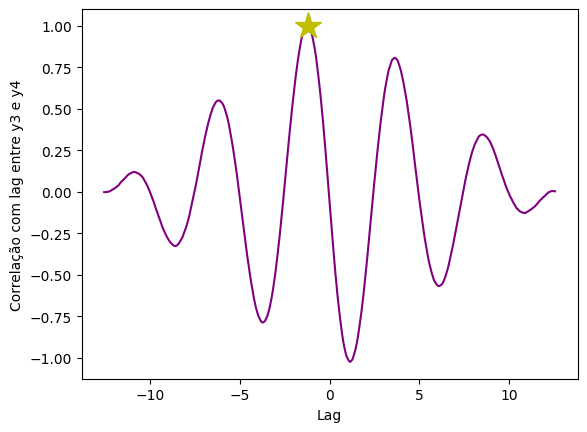

In [16]:
plt.plot(lags,corr_y3_y4, color='purple')
plt.plot(lags[nmax],corr_y3_y4[nmax],'y*', markersize = 20) #ponto máximo
plt.xlabel('Lag')
plt.ylabel('Correlação com lag entre y3 e y4')

In [17]:
# Lag estimado entre as séries via correlação
lags[nmax]

-1.1998042295116798

In [18]:
# Neste caso específico, em se tratando de sinal sinusoidal, podemos calcular
# a diferença de fase entre as séries
lags[nmax]*omg

-1.507718461271942